this notebook is for Week9-Assignment
author: Rui Zeng, N15471955, rz2522@nyu.edu
assignment:
1. Using the production data, compute the radial distribution function between type 1 and type 1 particles, type 2 and type 2, and type 1 and type 2. 
Make 3 separate figures showing g_11(r), g_22(r), g_12(r) - each one at all the temperatures. 

2. Using the production data, compute the mean-squared displacement for type 1 particles at each tempearture. Make a figure showing the MSD at each temperature. This figure should be on a log-log scale. If you do this, you will see there is a small plateau and then diffusive behavior at longer time (linear slope).

3. Find the time where MSD = 1 at each temperature. This is the time where the particle would diffuse 1 diameter on average. Make a plot of this time vs $1/T$. This should also be a log-log plot.

In [134]:
# import libraries
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.analysis.msd as msd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
# file paths
topology = "../Data/equil/kalj_T2_n360_v300_10000_1.lammpstrj"
# temeperature is 1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475, 0.45
trajectory_prod_T1p5 = "../Data/prod/kalj_T1.5_n360_v300_prod_10000_1.unwrap.dcd"
trajectory_prod_T1 = "../Data/prod/kalj_T1_n360_v300_prod_50000_1.unwrap.dcd"
trajectory_prod_T0p9 = "../Data/prod/kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd"
trajectory_prod_T0p8 = "../Data/prod/kalj_T0.8_n360_v300_prod_150000_1.unwrap.dcd"
trajectory_prod_T0p7 = "../Data/prod/kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd"
trajectory_prod_T0p65 = "../Data/prod/kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd"
trajectory_prod_T0p6 = "../Data/prod/kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd"
trajectory_prod_T0p55 = "../Data/prod/kalj_T0.55_n360_v300_prod_3000000_1.unwrap.dcd"
trajectory_prod_T0p5 = "../Data/prod/kalj_T0.5_n360_v300_prod_10000000_1.unwrap.dcd"
trajectory_prod_T0p475 = "../Data/prod/kalj_T0.475_n360_v300_prod_30000000_1.unwrap.dcd"
trajectory_prod_T0p45 = "../Data/prod/kalj_T0.45_n360_v300_prod_100000000_1.unwrap.dcd"

In [65]:
# load traj with mdanalysis universe
traj_T1p5 = mda.Universe(topology, trajectory_prod_T1p5, topology_format="LAMMPSDUMP")
traj_T1 = mda.Universe(topology, trajectory_prod_T1, topology_format='LAMMPSDUMP')
traj_T0p9 = mda.Universe(topology, trajectory_prod_T0p9, topology_format='LAMMPSDUMP')
traj_T0p8 = mda.Universe(topology, trajectory_prod_T0p8, topology_format='LAMMPSDUMP')
traj_T0p7 = mda.Universe(topology, trajectory_prod_T0p7, topology_format='LAMMPSDUMP')
traj_T0p65 = mda.Universe(topology, trajectory_prod_T0p65, topology_format='LAMMPSDUMP')
traj_T0p6 = mda.Universe(topology, trajectory_prod_T0p6, topology_format='LAMMPSDUMP')
traj_T0p55 = mda.Universe(topology, trajectory_prod_T0p55, topology_format='LAMMPSDUMP')
traj_T0p5 = mda.Universe(topology, trajectory_prod_T0p5, topology_format='LAMMPSDUMP')
traj_T0p475 = mda.Universe(topology, trajectory_prod_T0p475, topology_format='LAMMPSDUMP')
traj_T0p45 = mda.Universe(topology, trajectory_prod_T0p45, topology_format='LAMMPSDUMP')


c:\ProgramData\Miniconda3\lib\site-packages\MDAnalysis\topology\LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


In [73]:
# RDF data preparation

#define temperature list
temperatures = [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475, 0.45]
#define trajectory list
traj_list = [traj_T1p5, traj_T1, traj_T0p9, traj_T0p8, traj_T0p7, traj_T0p65, traj_T0p6, traj_T0p55, traj_T0p5, traj_T0p475, traj_T0p45]
#create empty list to store rdf values
rdfs = np.empty((3, len(traj_list)), dtype=object)


#compute rdf for each trajectory, type 1 and type 1 particles, type 2 and type 2, and type 1 and type 2
for traj in traj_list:
    # define selection
    sel1 = traj.select_atoms("type 1")
    sel2 = traj.select_atoms("type 2")
    # compute rdf
    rdfs[0, traj_list.index(traj)] = rdf.InterRDF(sel1, sel1, nbins=100, range=(0, 10))
    rdfs[1, traj_list.index(traj)] = rdf.InterRDF(sel2, sel2, nbins=100, range=(0, 10))
    rdfs[2, traj_list.index(traj)] = rdf.InterRDF(sel1, sel2, nbins=100, range=(0, 10))
    # run rdf
    rdfs[0, traj_list.index(traj)].run()
    rdfs[1, traj_list.index(traj)].run()
    rdfs[2, traj_list.index(traj)].run()
    


c:\ProgramData\Miniconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
c:\ProgramData\Miniconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


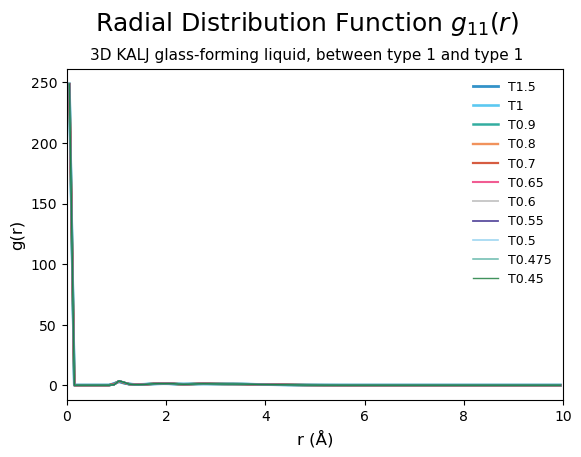

In [129]:
# figure 1 - RDFs
fig = plt.figure(1)

# set colorblind-friendly palatte 
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']
# add more colors if needed
colors = colors + ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#882255', '#AA4499']
# set 11 line width, range from 2 to 1
linewidths = np.linspace(2, 1, 11)
# temperature list
temps = ['1.5', '1', '0.9', '0.8', '0.7', '0.65', '0.6', '0.55', '0.5', '0.475', '0.45']

# plot RDFs
for j in range(len(temps)):
    plt.plot(rdfs[0, j].bins, rdfs[0, j].rdf, color=colors[j], linewidth=linewidths[j], label='T'+temps[j], alpha=0.8)
    j += 1
plt.xlabel('r (Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.xlim(0, 10)

# two lines of title
plt.text(x=0.5, y=0.88, s="Radial Distribution Function "+r"$g_{11}(r)$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "3D KALJ glass-forming liquid, between type 1 and type 1", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig1.[3D_KALJ]_RDF_type1_type1.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')


c:\ProgramData\Miniconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
c:\ProgramData\Miniconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


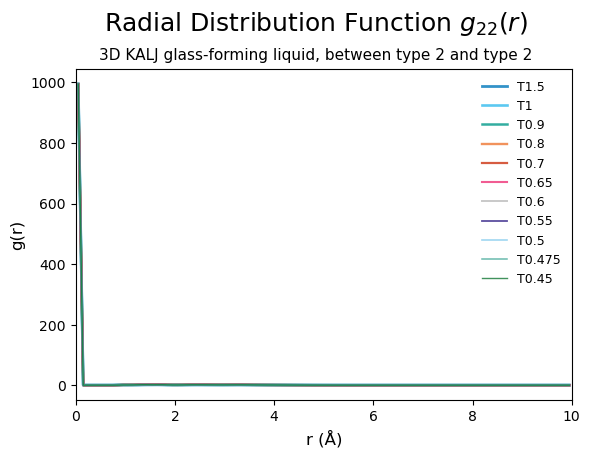

In [130]:
# figure 2 - RDFs
fig = plt.figure(2)

# set colorblind-friendly palatte
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']
# add more colors if needed
colors = colors + ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#882255', '#AA4499']
# set 11 line width, range from 2 to 1
linewidths = np.linspace(2, 1, 11)
# temperature list
temps = ['1.5', '1', '0.9', '0.8', '0.7', '0.65', '0.6', '0.55', '0.5', '0.475', '0.45']

# plot RDFs
for j in range(len(temps)):
    plt.plot(rdfs[1, j].bins, rdfs[1, j].rdf, color=colors[j], linewidth=linewidths[j], label='T'+temps[j], alpha=0.8)
    j += 1
plt.xlabel('r (Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.xlim(0, 10)

# two lines of title
plt.text(x=0.5, y=0.88, s="Radial Distribution Function "+r"$g_{22}(r)$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "3D KALJ glass-forming liquid, between type 2 and type 2", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig2.[3D_KALJ]_RDF_type2_type2.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')

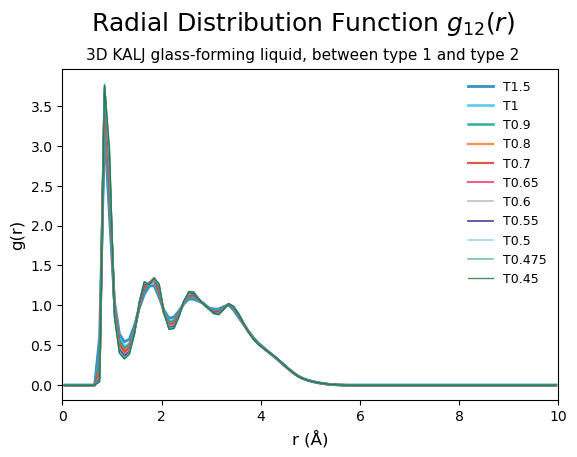

In [132]:
# figure 3 - RDFs
fig = plt.figure(3)

# set colorblind-friendly palatte
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']
# add more colors if needed
colors = colors + ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#882255', '#AA4499']
# set 11 line width, range from 2 to 1
linewidths = np.linspace(2, 1, 11)
# temperature list
temps = ['1.5', '1', '0.9', '0.8', '0.7', '0.65', '0.6', '0.55', '0.5', '0.475', '0.45']

# plot RDFs
for j in range(len(temps)):
    plt.plot(rdfs[2, j].bins, rdfs[2, j].rdf, color=colors[j], linewidth=linewidths[j], label='T'+temps[j], alpha=0.8)
    j += 1
plt.xlabel('r (Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.xlim(0, 10)

# two lines of title
plt.text(x=0.5, y=0.88, s="Radial Distribution Function "+r"$g_{12}(r)$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "3D KALJ glass-forming liquid, between type 1 and type 2", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig3.[3D_KALJ]_RDF_type1_type2.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')


In [146]:
# MSD data preparation

#define trajectory list
traj_list = [traj_T1p5, traj_T1, traj_T0p9, traj_T0p8, traj_T0p7, traj_T0p65, traj_T0p6, traj_T0p55, traj_T0p5, traj_T0p475, traj_T0p45]
#create empty list to store rdf values
msds = np.empty(len(temps), dtype=object)
#select atom type 1
sel = 'type 1'

# calculate MSDs
for traj in traj_list:
    # compute msd
    msds[traj_list.index(traj)] = msd.EinsteinMSD(traj, select=sel, msd_type='xyz', fft=False)
    # run
    msds[traj_list.index(traj)].run()


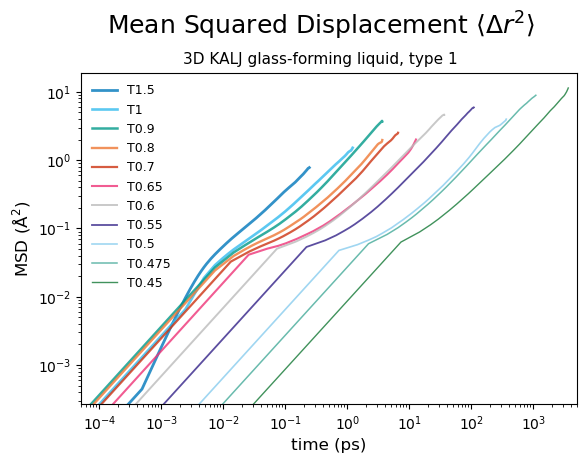

In [178]:
# figure 4 - MSDs
fig = plt.figure(4)

# set colorblind-friendly palatte
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']
# add more colors if needed
colors = colors + ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#882255', '#AA4499']
# set 11 line width, range from 2 to 1
linewidths = np.linspace(2, 1, 11)
# temperature list
temps = ['1.5', '1', '0.9', '0.8', '0.7', '0.65', '0.6', '0.55', '0.5', '0.475', '0.45']

# plot MSDs
for j in range(len(temps)):
    
    plt.loglog(msds[j].times, msds[j].results.timeseries, color=colors[j], linewidth=linewidths[j], label='T'+temps[j], alpha=0.8)
    j += 1
plt.xlabel('time (ps)', fontsize=12)
plt.ylabel('MSD (Å$^2$)', fontsize=12)
plt.legend(loc='upper left', fontsize=9, frameon=False)
plt.xlim(0.00005, 5000)

# two lines of title
plt.text(x=0.5, y=0.88, s="Mean Squared Displacement "+r"$\langle \Delta r^2 \rangle$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "3D KALJ glass-forming liquid, type 1", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig4.[3D_KALJ]_MSD_type1.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')


In [213]:
# data preparation
#Find the time where MSD = 1 at each temperature. This is the time where the particle would diffuse 1 diameter on average. Make a plot of this time vs $1/T$. This should also be a log-log plot.

# define empty list to store diffusion times
diffusion_times = []
# loop over all temperatures
for j in range(len(temps)):
    # try find the index of the first time where MSD > 1
    try :
        index = np.where(msds[j].results.timeseries > 1)[0][0]
    # if not found, set index to -1
    except IndexError:
        index = -1
    # append the diffusion time to the list
    diffusion_times.append(msds[j].times[index])
    j += 1

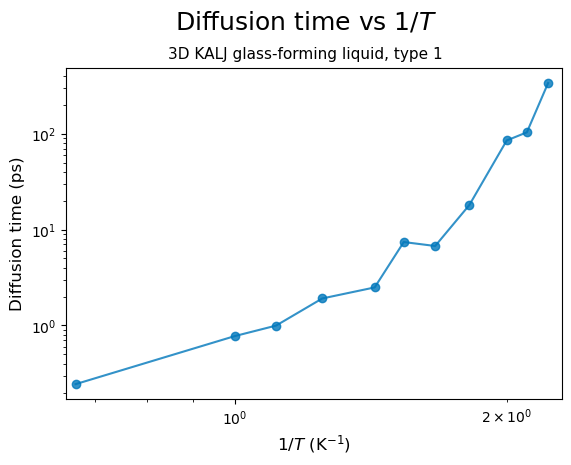

In [217]:
# figure 5 - diffusion times vs 1/T
fig = plt.figure(5)

# plot diffusion times vs 1/T
plt.loglog(1/np.array(temps, dtype=float), diffusion_times,'o', color='#0077BB', alpha=0.8)
plt.loglog(1/np.array(temps, dtype=float), diffusion_times, color='#0077BB', alpha=0.8)
plt.xlabel(r'$1/T$ (K$^{-1}$)', fontsize=12)
plt.ylabel('Diffusion time (ps)', fontsize=12)
plt.xlim(0.65, 2.3)

# two lines of title
plt.text(x=0.5, y=0.88, s="Diffusion time vs "+r"$1/T$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "3D KALJ glass-forming liquid, type 1", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig5.[3D_KALJ]_diffusion_time_vs_1_over_T_type1.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')
